<a href="https://colab.research.google.com/github/LucaLazar07/LSA-AI-ML-Internship/blob/main/Week3Assignment_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import os
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout, Input, Conv2D, MaxPool2D, Flatten
from keras.models import Sequential
from keras.activations import sigmoid, relu
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

**Importing the MNIST dataset**

In [35]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshaping image for adding color channel
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# one hot encoding the labels to an array with 10 elements
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [36]:
len(X_train) # there are 60000 photos used for training the model

60000

In [37]:
X_train.shape # the images are 28 x 28 pixels

(60000, 28, 28, 1)

In [38]:
X_train[0] # first image of the training set

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

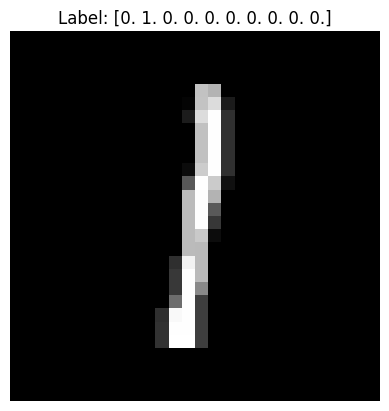

In [39]:
# Print a random photo
i = random.randint(0, len(X_train))

plt.imshow(X_train[i], cmap='gray')
plt.title(f"Label: {y_train[i]}")
plt.axis("off")
plt.show()

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = "nearest"
)

train_iterator = train_generator.flow(X_train, y_train, batch_size=512)

validation_generator = ImageDataGenerator(rescale=1./255)

validation_iterator = validation_generator.flow(X_test, y_test, batch_size= 512)


**Model Creation**

In [41]:
from keras.src.ops.numpy import Max
model = Sequential([
  Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  MaxPool2D(2,2),
  Conv2D(64, (3,3), activation='relu'),
  MaxPool2D(2,2),
  Conv2D(128, (3,3), activation='relu'),
  Dropout(0.2),
  Flatten(),
  Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
model.fit(train_iterator, epochs=20, validation_data=validation_iterator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 77s 636ms/step - accuracy: 0.2576 - loss: 0.3589 - val_accuracy: 0.7960 - val_loss: 0.1189
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 78s 603ms/step - accuracy: 0.7427 - loss: 0.1422 - val_accuracy: 0.9163 - val_loss: 0.0630
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 72s 611ms/step - accuracy: 0.8533 - loss: 0.0917 - val_accuracy: 0.9398 - val_loss: 0.0423
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 81s 605ms/step - accuracy: 0.8935 - loss: 0.0698 - val_accuracy: 0.9560 - val_loss: 0.0321
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 69s 587ms/step - accuracy: 0.9160 - loss: 0.0571 - val_accuracy: 0.9580 - val_loss: 0.0287
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 69s 584ms/step - accuracy: 0.9261 - loss: 0.0500 - val_accuracy: 0.9679 - val_loss: 0.0248
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 69s 588ms/step - accuracy: 0.9342 - loss: 0.0449 - val_accuracy: 0.9713 - val_loss: 0.0206
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 69s 584ms/step - accuracy: 0.9421 - loss: 0

**Test on a random image**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


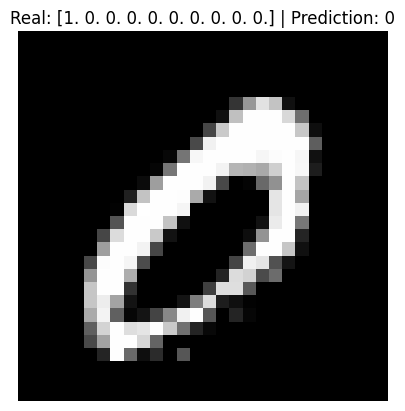

In [130]:
# random index from the test set
i = random.randint(0, len(X_test))
test_image = X_test[i]
test_label = y_test[i]

# the model awaits a batch so we need to add a dimension
# from (28, 28, 1) -> (1, 28, 28, 1)
prediction_input = np.expand_dims(test_image, axis=0)

prediction = model.predict(prediction_input)
print(prediction)
prediction_label = np.argmax(prediction)

plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Real: {test_label} | Prediction: {prediction_label}")
plt.axis('off')
plt.show()